In [131]:
import pandas as pd
df = pd.read_csv('iris.csv')
df

,5.1,3.5,0
0,4.9,3.0,0
1,4.7,3.2,0
2,4.6,3.1,0
3,5.0,3.6,0
4,5.4,3.9,0
...,...,...,...
94,5.7,3.0,1
95,5.7,2.9,1
96,6.2,2.9,1
97,5.1,2.5,1


In [132]:
fist_class = [1 for i in df['0'] if i ==1]
number_fist_class = len(fist_class)
phi= number_fist_class/len(df['0'])
phi

0.5050505050505051

In [133]:
import numpy as np


Y = np.array(df['0'])
X = df[['5.1', '3.5']].to_numpy()


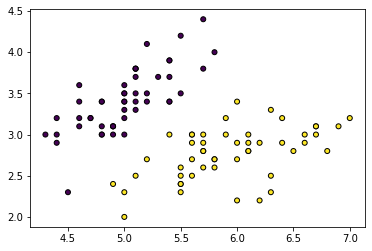

In [134]:

import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], marker='o', c=Y,
            s=25, edgecolor='k')

In [135]:
df

,5.1,3.5,0
0,4.9,3.0,0
1,4.7,3.2,0
2,4.6,3.1,0
3,5.0,3.6,0
4,5.4,3.9,0
...,...,...,...
94,5.7,3.0,1
95,5.7,2.9,1
96,6.2,2.9,1
97,5.1,2.5,1


In [124]:
first_class = [df[['5.1', '3.5']] for i in df['0'] if i ==1]
zero_class = [df[['5.1', '3.5']] for i in df['0'] if i ==0]


for index in len(df):
    if df['0']==1:
        first_classX[index]

,5.1,3.5
0,4.9,3.0
1,4.7,3.2
2,4.6,3.1
3,5.0,3.6
4,5.4,3.9
...,...,...
94,5.7,3.0
95,5.7,2.9
96,6.2,2.9
97,5.1,2.5


In [137]:
first_class = []
zero_class = []
for index in range(len(Y)):
    if Y[index]==1:
        first_class.append(X[index])
    if Y[index]==0:
        zero_class.append(X[index])
        
        
first_class = np.array(first_class)

zero_class = np.array(zero_class)
print(zero_class.shape, first_class.shape)

(49, 2) (50, 2)


In [138]:
phi  = first_class.shape[0]/X.shape[0]
phi

0.5050505050505051

In [170]:
mu0 = zero_class.mean(axis=0)/99
mu1 = first_class.mean(axis=0)/99
print(mu0, mu1)

[0.05054628 0.03450835] [0.0599596 0.0279798]


In [165]:
# np.sum((zero_class - mu0).dot((zero_class - mu0).T), axis = 1)

In [171]:
a = ((zero_class - mu0).T).dot((zero_class - mu0))
a

array([[1208.41729611,  825.75257491],
       [ 825.75257491,  567.5049553 ]])

In [172]:
b = ((first_class - mu1).T).dot((first_class - mu1))

In [173]:
cov = (a+b)/99

array([[29.77641452, 16.52058232],
       [16.52058232,  9.57842116]])

In [203]:
def normal_dist_gda(x , mean, cov):

    dim = np.shape(cov)[0]
    covdet = np.linalg.det(cov + np.eye(dim) * 0.001)
    
    part1 = 1/(((2*np.pi)**(dim/2))*(np.abs(covdet)**0.5))

    
    part2 = np.exp(-0.5 *((x-mean)).dot(np.linalg.inv(cov)).dot((x-mean).T))
    
    prob_density = part1*part2   
    
    return prob_density[1]   


In [204]:
x0_gda = normal_dist_gda(zero_class, mu0, cov)
x0_gda.shape

(49,)

In [205]:
# x0_gda

In [206]:
x1_gda = normal_dist_gda(first_class, mu1, cov)

In [207]:
theta0 = (mu0-mu1)/cov
theta0

array([[-0.00941332, -0.0337107 ],
       [ 0.04860643,  0.00652855]])

In [208]:
theta1 = ((1-phi)/phi)* ((mu0**2+mu1**2)/2*cov)
theta1

array([[ 0.00301354, -0.00018729],
       [-0.00058361,  0.00096711]])

In [224]:
theta = np.concatenate((theta0, theta1), axis=0)

In [225]:
def predict(X, theta):
    return np.dot(X, theta)

In [226]:
X_I = np.c_[np.ones_like(X), X]
# X_I

In [228]:
pred = predict(X_I, theta)

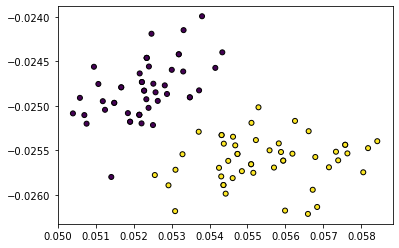

In [234]:
plt.scatter(pred[:, 0], pred[:, 1], marker='o', c=Y,
            s=25, edgecolor='k')


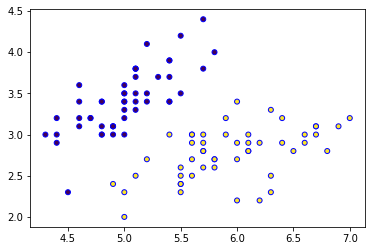

In [239]:
plt.scatter(X[:, 0], X[:, 1], marker='o', c=Y,
            s=25, edgecolor='b')

In [246]:
pred

array([[ 0.05220861, -0.02519857],
       [ 0.05148918, -0.02496768],
       [ 0.05124619, -0.02504567],
       [ 0.0521598 , -0.02463703],
       [ 0.05319013, -0.02442181],
       [ 0.0510711 , -0.02475553],
       [ 0.05227652, -0.02483045],
       [ 0.0507602 , -0.02520163],
       [ 0.05215025, -0.02510185],
       [ 0.05330685, -0.02461523],
       [ 0.05167381, -0.02479299],
       [ 0.05190726, -0.02517984],
       [ 0.05040049, -0.02508619],
       [ 0.05433718, -0.02440002],
       [ 0.05380238, -0.02399445],
       [ 0.05319013, -0.02442181],
       [ 0.05251951, -0.02475247],
       [ 0.05415255, -0.02457471],
       [ 0.05234443, -0.02446234],
       [ 0.05348193, -0.02490537],
       [ 0.05240279, -0.02455905],
       [ 0.05095438, -0.02456211],
       [ 0.05263623, -0.02494589],
       [ 0.05167381, -0.02479299],
       [ 0.05250996, -0.02521729],
       [ 0.05227652, -0.02483045],
       [ 0.05282087, -0.0247712 ],
       [ 0.05287923, -0.02486791],
       [ 0.05148918,

In [245]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

clf = LinearDiscriminantAnalysis()
clf.fit(X, Y)
LinearDiscriminantAnalysis()
print(clf.predict(X))


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
